In [1]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"

import os
os.chdir(ROOT)

os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [2]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import cv2

In [3]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    return img
  try:
    cv2.imshow("display", img)
    return img
  except Exception as e:
    # print(e)
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    return img


In [4]:
img_path = "car.jpg"

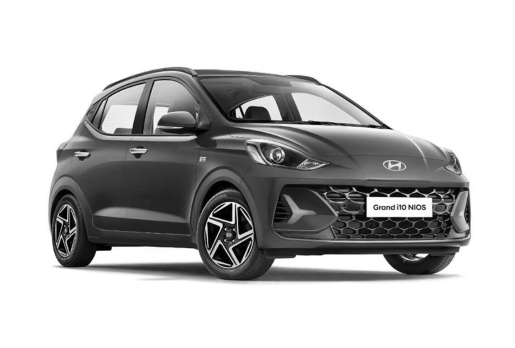

In [5]:
car = read_img(path=img_path, grayscale=True)

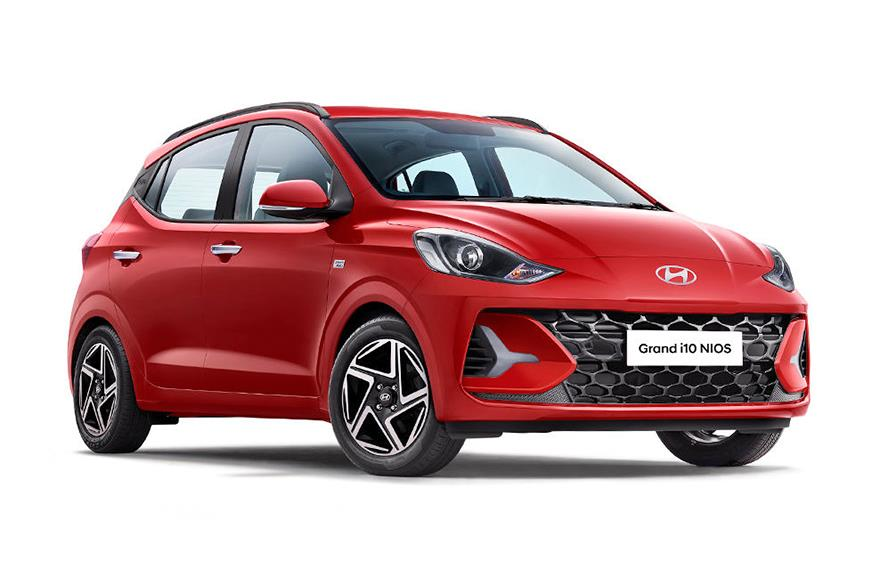

In [6]:
color_car = read_img(path=img_path, grayscale=False)

In [7]:
car.shape

(578, 872)

In [8]:
color_car.shape

(578, 872, 3)

Apply a single conv layer

In [9]:
row, col = car.shape
batch = 1 # Single IMage is there
ch = 1 # GrayScale
reshaped_car_img = car.reshape(batch, row, col, ch)

In [10]:
input_shape = reshaped_car_img.shape[1:]
CONV_LAYER = [
  tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides = (1, 1), input_shape=input_shape)
]
conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 576, 870, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [11]:
out = conv_model.predict(reshaped_car_img)

1/1 [==============================] - 0s 201ms/step


In [12]:
out.shape

(1, 576, 870, 1)

In [13]:
row, col = out.shape[1:-1]
row, col

(576, 870)

In [14]:
reshape_out = out.reshape(row, col)
reshape_out

array([[-132.95393, -132.95393, -132.95393, ..., -132.95393, -132.95393,
        -132.95393],
       [-132.95393, -132.95393, -132.95393, ..., -132.95393, -132.95393,
        -132.95393],
       [-132.95393, -132.95393, -132.95393, ..., -132.95393, -132.95393,
        -132.95393],
       ...,
       [-132.95393, -132.95393, -132.95393, ..., -132.95393, -132.95393,
        -132.95393],
       [-132.95393, -132.95393, -132.95393, ..., -132.95393, -132.95393,
        -132.95393],
       [-132.95393, -132.95393, -132.95393, ..., -132.95393, -132.95393,
        -132.95393]], dtype=float32)

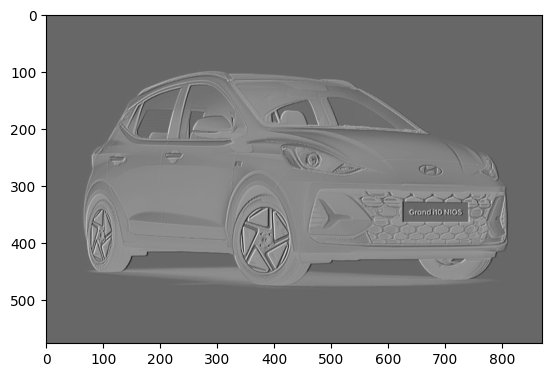

In [15]:
plt.imshow(reshape_out, cmap="gray")

COLOR IMAGE

In [16]:
color_car.shape

(578, 872, 3)

In [17]:
row, col, ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row, col, ch)
color_car_reshaped.shape

(1, 578, 872, 3)

In [18]:
color_car_shape = color_car_reshaped.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides = (1, 1), input_shape=color_car_shape)
]
conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 576, 870, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [19]:
out = conv_model.predict(color_car_reshaped)

1/1 [==============================] - 0s 468ms/step


In [20]:
out.shape

(1, 576, 870, 1)

In [21]:
_, row, col, _ = out.shape

reshaped_out = out.reshape(row, col)

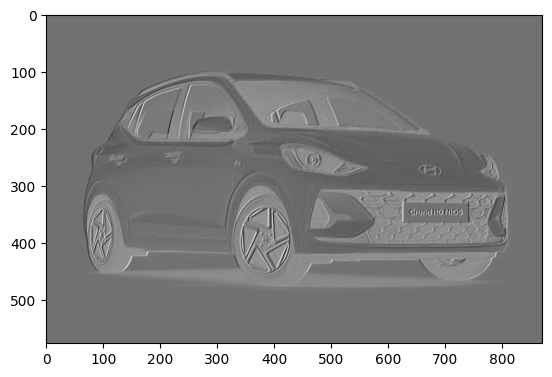

In [22]:
plt.imshow(reshaped_out, cmap="gray")

In [23]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1)
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [24]:
def get_conv_model(filter=1, kernel_size=(3,3), strides=(1,1), input_shape = None, padding="valid"):
  CONV_LAYER = [
      tf.keras.layers.Conv2D(
          filters=filter,
          kernel_size=kernel_size,
          strides = strides,
          input_shape=input_shape,
          padding=padding)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model


In [25]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, ch = out.shape
    reshape_out = out.reshape(row, col, ch)
    for channel in range(ch):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    print(e)
    raise e


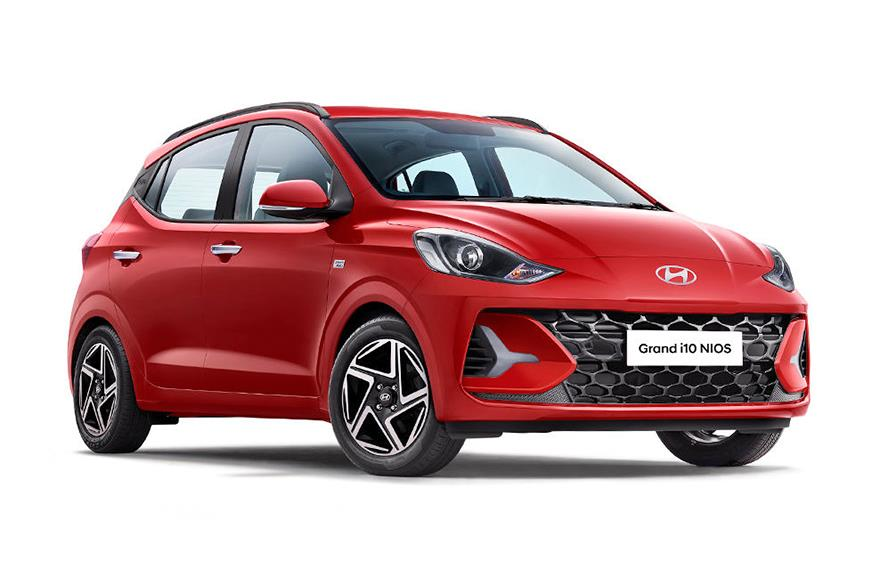

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 576, 870, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 350ms/step
(1, 576, 870, 1)


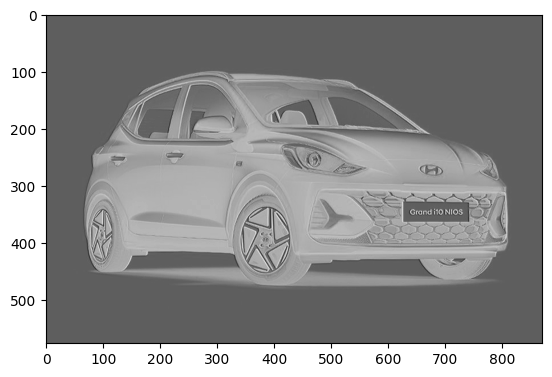

In [26]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(
                filter=1,
                kernel_size=(3,3),
                strides=(1,1),
                input_shape = input_img.shape[1:],
                padding="valid")

apply_conv_model_and_visualize(input_img, model)

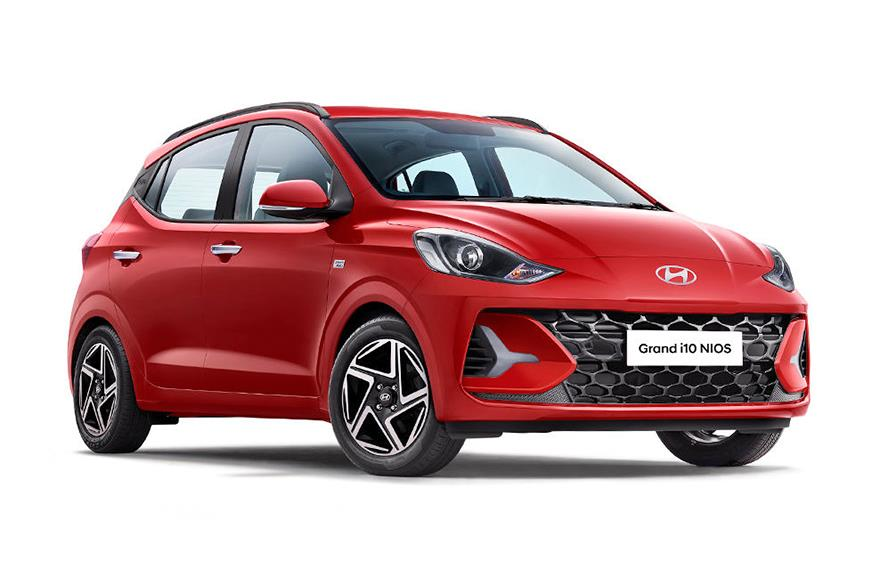

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 576, 870, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 548ms/step
(1, 576, 870, 5)


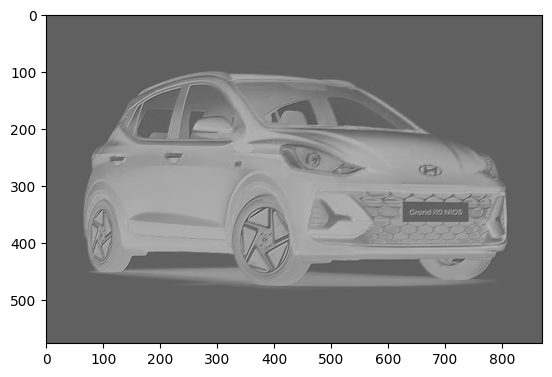

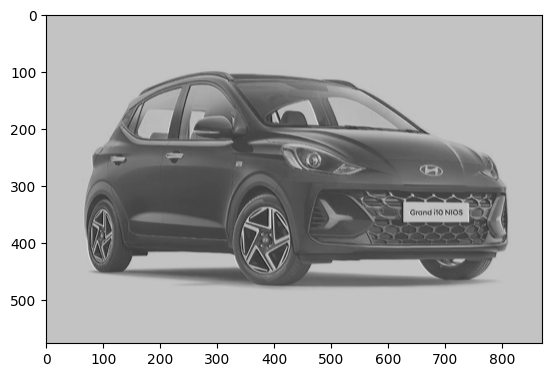

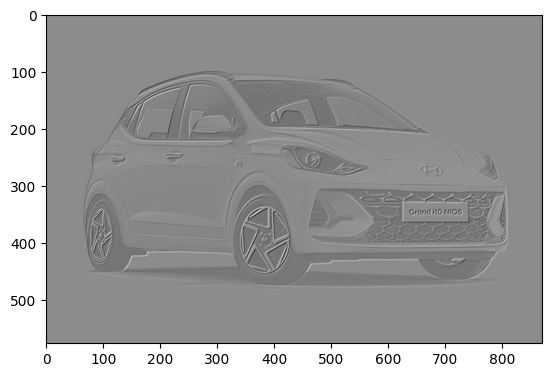

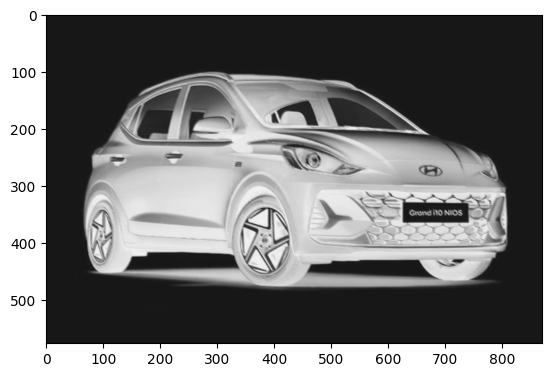

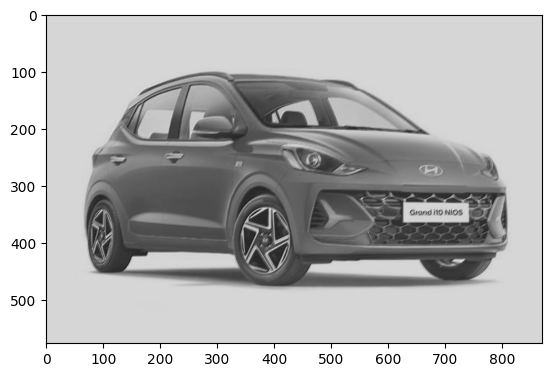

In [27]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(
                filter=5,
                kernel_size=(3,3),
                strides=(1,1),
                input_shape = input_img.shape[1:],
                padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [28]:
def max_pooling(img, pool_size=(1,1), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size, strides=strides)

  result = pooling_layer(reshaped_img)
  return result

(578, 872)


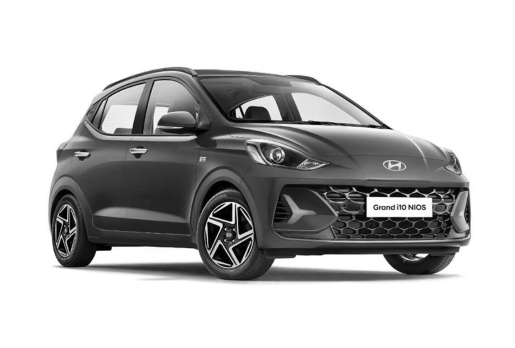

In [29]:
img = read_img(img_path)
print(img.shape)

In [30]:
result = max_pooling(img)
print(result.shape)

(1, 289, 436, 1)


In [31]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

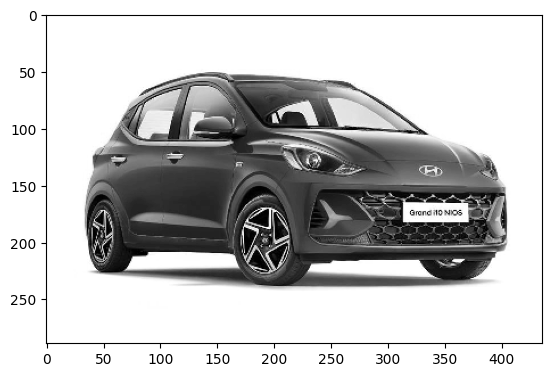

In [32]:
plot_pooling(result)

In [33]:
result.shape

TensorShape([1, 289, 436, 1])

In [35]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))
result = max_pooling(reshape.numpy())
print(result.shape)

(1, 145, 218, 1)


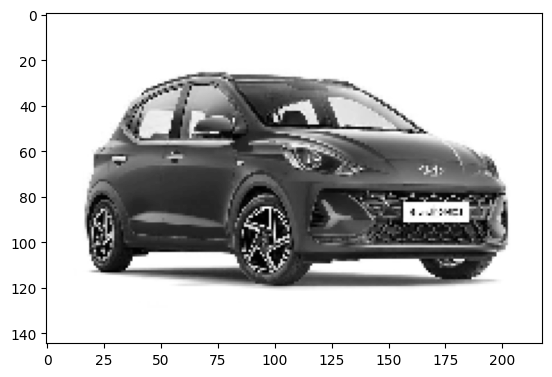

In [36]:
plot_pooling(result)